In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('advanced_stats_df.csv',index_col='Team')

In [3]:
df.columns
df.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head()

,2020_assist_ratio,Home_assist_ratio,Away_assist_ratio,2019_assist_ratio,2020_defensive_efficiency,Home_defensive_efficiency,Away_defensive_efficiency,2019_defensive_efficiency,2020_defensive_rebounding_rate,Home_defensive_rebounding_rate,...,Away_rebound_rate,2019_rebound_rate,2020_true_shooting,Home_true_shooting,Away_true_shooting,2019_true_shooting,2020_turnover_ratio,Home_turnover_ratio,Away_turnover_ratio,2019_turnover_ratio
Team,,,,,,,,,,,,,,,,,,,,,
Phoenix,0.266,0.267,0.265,0.259,1.082,1.061,1.104,1.081,78.5%,80.6%,...,47.9%,49.6%,118.6%,119.3%,117.9%,114.3%,12.4%,12.7%,12.1%,14.1%
Denver,0.265,0.270,0.261,0.257,1.088,1.079,1.098,1.085,78.9%,80.2%,...,51.0%,50.5%,116.8%,116.7%,117.0%,113.3%,13.3%,13.0%,13.7%,13.7%
Charlotte,0.263,0.264,0.263,0.239,1.098,1.074,1.121,1.099,75.7%,76.1%,...,48.6%,48.8%,111.9%,111.5%,112.3%,106.9%,14.6%,14.7%,14.4%,14.6%
Miami,0.263,0.264,0.262,0.252,1.080,1.090,1.070,1.066,77.9%,75.9%,...,49.0%,51.0%,115.3%,117.0%,113.6%,116.3%,14.1%,14.8%,13.4%,14.2%
Golden State,0.262,0.277,0.247,0.245,1.069,1.064,1.073,1.103,76.6%,77.0%,...,46.8%,48.1%,115.8%,119.4%,112.2%,107.2%,14.3%,14.4%,14.3%,14.3%


In [5]:
def p2f(x):
    return float(x.strip('%'))/100

In [6]:
#shit python, don't need the lambda, I already have the p2f fx.

for col in df.select_dtypes(include='object'):
    df[col] = df[col].apply(lambda x: p2f(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Phoenix to Portland
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2020_assist_ratio               30 non-null     float64
 1   Home_assist_ratio               30 non-null     float64
 2   Away_assist_ratio               30 non-null     float64
 3   2019_assist_ratio               30 non-null     float64
 4   2020_defensive_efficiency       30 non-null     float64
 5   Home_defensive_efficiency       30 non-null     float64
 6   Away_defensive_efficiency       30 non-null     float64
 7   2019_defensive_efficiency       30 non-null     float64
 8   2020_defensive_rebounding_rate  30 non-null     float64
 9   Home_defensive_rebounding_rate  30 non-null     float64
 10  Away_defensive_rebounding_rate  30 non-null     float64
 11  2019_defensive_rebounding_rate  30 non-null     float64
 12  2020_effective_fg_pct          

In [7]:
cols_2020 = []
cols_2019 = []
cols_Away=  []
cols_Home = []

In [8]:
for col in df.columns:
    if col[:4] == 'Home':
        cols_Home.append(col)
    if col[:4] == 'Away':
        cols_Away.append(col)
    if col[:4] == '2020':
        cols_2020.append(col)
    if col[:4] == '2019':
        cols_2019.append(col)

In [9]:
cols_Home

['Home_assist_ratio',
 'Home_defensive_efficiency',
 'Home_defensive_rebounding_rate',
 'Home_effective_fg_pct',
 'Home_offensive_efficiency',
 'Home_offensive_rebound_rate',
 'Home_pace',
 'Home_rebound_rate',
 'Home_true_shooting',
 'Home_turnover_ratio']

In [10]:
df_2020 = df[cols_2020]
df_2019 = df[cols_2019]
df_Home = df[cols_Home]
df_Away = df[cols_Away]

In [11]:
df_names = [df, df_2019, df_2020, df_Home, df_Away]

In [12]:
df_2020.head(3)

,2020_assist_ratio,2020_defensive_efficiency,2020_defensive_rebounding_rate,2020_effective_fg_pct,2020_offensive_efficiency,2020_offensive_rebound_rate,2020_pace,2020_rebound_rate,2020_true_shooting,2020_turnover_ratio
Team,,,,,,,,,,
Phoenix,0.266,1.082,0.785,0.564,1.140,0.208,101.1,0.495,1.186,0.124
Denver,0.265,1.088,0.789,0.557,1.137,0.247,101.2,0.518,1.168,0.133
Charlotte,0.263,1.098,0.757,0.532,1.075,0.233,101.9,0.494,1.119,0.146


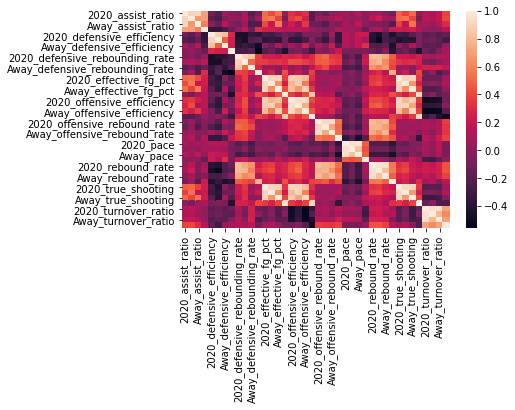

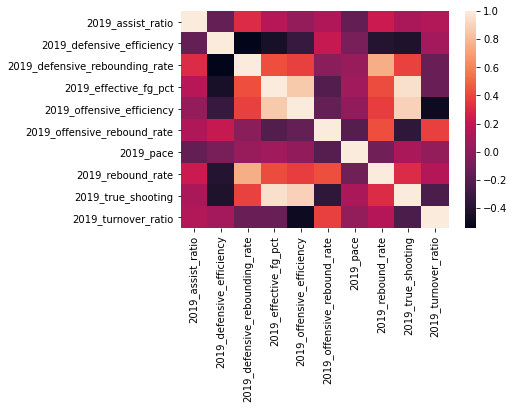

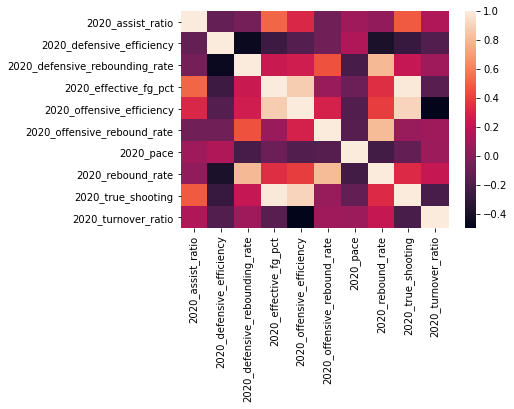

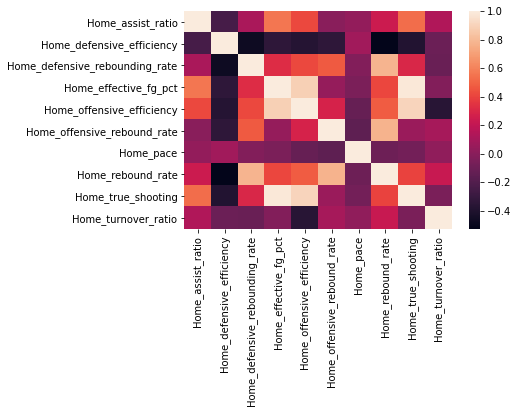

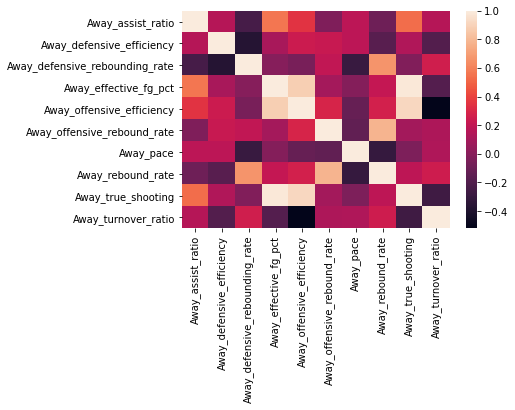

In [13]:
for frame in df_names:
    corrs = frame.corr()
    plt.figure()
    sns.heatmap(corrs)

C:\Users\Livng\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\Livng\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\Livng\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\Livng\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\Livng\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used t

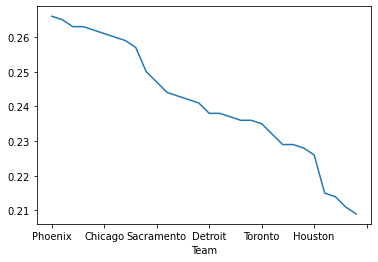

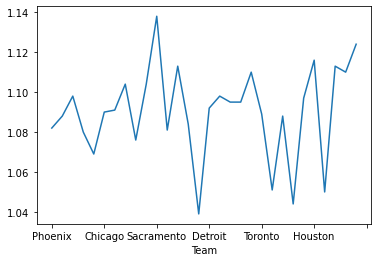

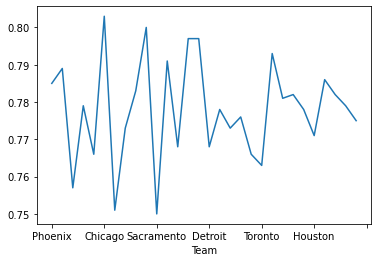

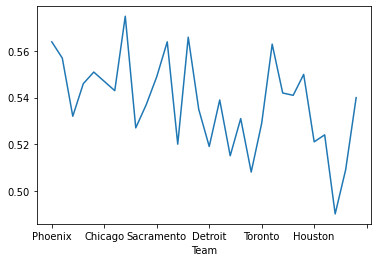

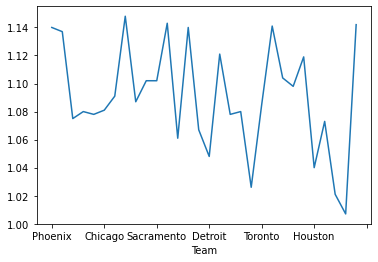

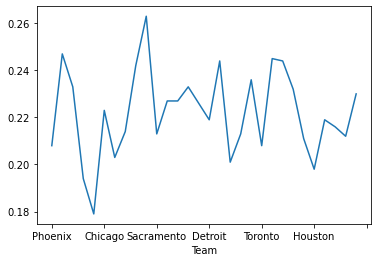

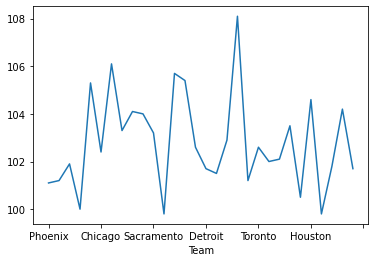

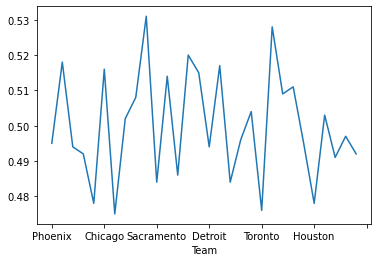

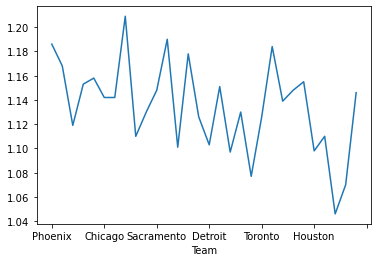

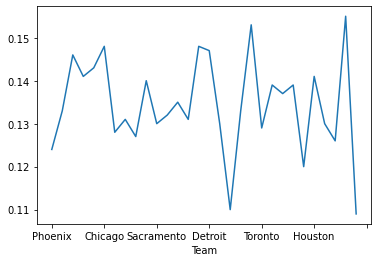

In [14]:
for col in df_2020.columns:
    plt.figure()
    df_2020[col].plot()

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
min_max_scaler = MinMaxScaler()

In [17]:
df_scaled = pd.DataFrame()

In [18]:
def scale(col):
    return min_max_scaler.fit_transform(col)

In [19]:
df_2020.head()

,2020_assist_ratio,2020_defensive_efficiency,2020_defensive_rebounding_rate,2020_effective_fg_pct,2020_offensive_efficiency,2020_offensive_rebound_rate,2020_pace,2020_rebound_rate,2020_true_shooting,2020_turnover_ratio
Team,,,,,,,,,,
Phoenix,0.266,1.082,0.785,0.564,1.140,0.208,101.1,0.495,1.186,0.124
Denver,0.265,1.088,0.789,0.557,1.137,0.247,101.2,0.518,1.168,0.133
Charlotte,0.263,1.098,0.757,0.532,1.075,0.233,101.9,0.494,1.119,0.146
Miami,0.263,1.080,0.779,0.546,1.080,0.194,100.0,0.492,1.153,0.141
Golden State,0.262,1.069,0.766,0.551,1.078,0.179,105.3,0.478,1.158,0.143


In [20]:
df_2020 = min_max_scaler.fit_transform(df_2020)